# Project - Covid19 Tracker

## 1. Data handling
Load the data from Covid-19 API (Data as of March 7, 2021)

In [58]:
# Import Modules
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt

In [59]:
# Load data from Covid19 API
url = 'https://api.covidtracking.com/v1/us/daily.json'
r = requests.get(url)
json = r.json()

In [60]:
type(json)

list

In [61]:
df_covid = pd.DataFrame(json)

In [62]:
df_covid.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


## 2. Data cleaning

### 1) Check and replace value

In [63]:
df_covid.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,totalTestResults,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,392.000000,369.000000,4.200000e+02,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,187210.668367,310817.140921,1.073369e+08,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,142331.657380,235557.870159,1.129172e+08,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,0.000000,4.000000,0.000000e+00,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,86911.750000,123250.000000,5.888598e+06,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,169118.500000,280138.000000,6.839699e+07,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,258912.250000,481309.000000,1.854937e+08,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,515151.000000,776361.000000,3.638251e+08,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


In [64]:
df_covid.dtypes

date                          int64
states                        int64
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
dateChecked                  object
death                       float64
hospitalized                float64
totalTestResults              int64
lastModified                 object
recovered                    object
total                         int64
posNeg                        int64
deathIncrease                 int64
hospitalizedIncrease          int64
negativeIncrease              int64
positiveIncrease              int64
totalTestResultsIncrease      int64
hash                         object
dtype: object

In [65]:
# Check any rows with has null value
df_covid['death'].isnull().any()
df_covid['positiveIncrease'].isnull().any()
df_covid['negativeIncrease'].isnull().any()

# Check negative increase with has negative number
df_covid[df_covid['negativeIncrease'] < 0]

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
95,20201202,56,13925720.0,50105551.0,14368.0,100327.0,467773.0,19687.0,31038.0,6855.0,...,2020-12-02T24:00:00Z,None,0,0,2811,5238,-658774,203429,1587969,fb639848f171c8921ff4089bdf351447dc3df043
319,20200422,56,838190.0,1667505.0,4231.0,59204.0,34423.0,15705.0,2370.0,5474.0,...,2020-04-22T24:00:00Z,None,0,0,2150,1591,-213981,29273,335191,9ea15321df00da85092b908dd9b4087ccb64b321


In [66]:
# Replace any rows with null data to 0
df_covid['death'].fillna(0, inplace = True)

# Replace any rows with negative data positive
df_covid['negativeIncrease'] = df_covid['negativeIncrease'].abs()

In [67]:
# Check again
df_covid['death'].isnull().any()
df_covid['positiveIncrease'].isnull().any()
df_covid['negativeIncrease'].isnull().any()
df_covid[df_covid['negativeIncrease'] < 0]

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash


In [68]:
# Concert data type 
df_covid['date'] = pd.to_datetime(df_covid['date'], format='%Y%m%d')

# Check the data
df_covid

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,2020-01-16,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,2020-01-15,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,2020-01-14,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


### 2) Reshape data

In [69]:
# Capture the data that need
df_case = pd.DataFrame({'Date': df_covid.date, 'New_Death': df_covid.deathIncrease, 'New_Negative':df_covid.negativeIncrease, 
                        'New_Positive':df_covid.positiveIncrease})

In [70]:
df_case

,Date,New_Death,New_Negative,New_Positive
0,2021-03-07,842,131835,41835
1,2021-03-06,1680,143835,60015
2,2021-03-05,2221,271917,68787
3,2021-03-04,1743,177957,65487
4,2021-03-03,2449,267001,66836
...,...,...,...,...
415,2020-01-17,0,0,0
416,2020-01-16,0,0,0
417,2020-01-15,0,0,0
418,2020-01-14,0,0,0


In [71]:
# Calculate which dates were worse(against prior date) to consider worse
df_case['Worse_Date'] = df_case['New_Positive'].diff(periods=-1) > 0

## 3. Data visualization

### 1) Create a line plot to show the daily increase value for the whole year

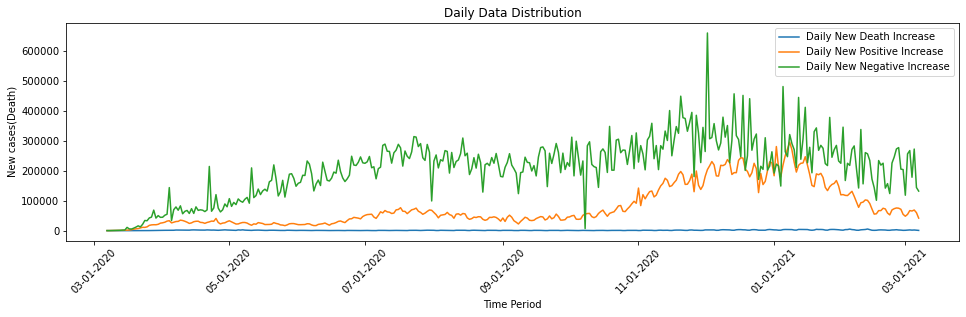

In [72]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Create a distribution (graph) and display it
# limit the latest 365 days (limit the time range)
v1_data = df_case.loc[df_case.index <= 365]
# v1_data = df_case[:100]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 4))

# Add three plots x-axis and y-axis
ax.plot(v1_data['Date'], v1_data['New_Death'])
ax.plot(v1_data['Date'], v1_data['New_Positive'])
ax.plot(v1_data['Date'], v1_data['New_Negative'])

# Set title and labels for axes
ax.set(xlabel="Time Period",
       ylabel="New cases(Death)",
       title="Daily Data Distribution",)

# Define the date format
date_form = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 45)
# fig.autofmt_xdate()

# Add legend
ax.legend(labels = ['Daily New Death Increase', 'Daily New Positive Increase', 'Daily New Negative Increase'])

# Show the figure
plt.show()

### 2) Create a function to show daily positive and negative increase frequency
***Using multiple subplots (histogram, boxplot and density plot)***

Minimum: 0.00
Mean: 68467.83
Median: 44664.50
Mode: 0.00
Maximum: 295121.00


/var/folders/y_/fnj6tt495952rsjpdv6d__l00000gn/T/ipykernel_7904/3690876448.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


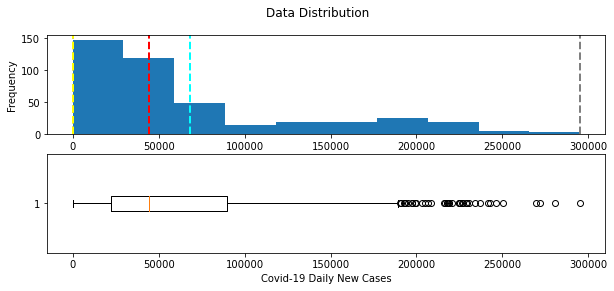

In [73]:
# Create a function
def show_distribution(s):
    # Get statistics
    min_val = s.min()
    max_val = s.max()
    mean_val = s.mean()
    med_val = s.median()
    mod_val = s.mode()[0]

    print('Minimum: %.2f\nMean: %.2f\nMedian: %.2f\nMode: %.2f\nMaximum: %.2f' % (min_val, mean_val, med_val, mod_val, max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))

    # Plot the histogram
    ax[0].hist(s)
    ax[0].set_ylabel('Frequency')

    # Add line for the mean, median, and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth = 2) 
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot
    ax[1].boxplot(s, vert=False)
    ax[1].set_xlabel('Covid-19 Daily New Cases')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution')
    
    # Show the figure
    fig.show()

show_distribution(df_case['New_Positive'])

Minimum: 0.00
Mean: 181734.13
Median: 208387.50
Mode: 0.00
Maximum: 658774.00


/var/folders/y_/fnj6tt495952rsjpdv6d__l00000gn/T/ipykernel_7904/3690876448.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


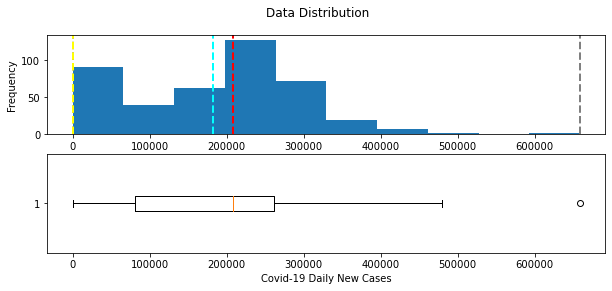

In [74]:
# Get the daily negative increase frequency
col = df_case['New_Negative']
# Call the function
show_distribution(col)

#### Using density plot to show the daily negative increase frequency

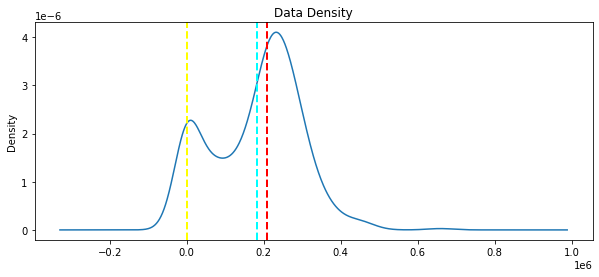

In [75]:
def show_density(s):
    fig = plt.figure(figsize=(10,4))
    
    # Plot density
    s.plot.density()
    
    # Add titles and labels
    plt.title('Data Density')
    
    # Show the mean, median, and more
    plt.axvline(x=s.mean(), color = 'cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=s.median(), color = 'red', linestyle='dashed', linewidth=2)
    plt.axvline(x=s.mode()[0], color = 'yellow', linestyle='dashed', linewidth=2)
    
    # Show the figure
    plt.show()
    
# Get the density of new positive
show_density(col)

### 3) Measures of variance
***range, variance and standard deviation***

In [76]:
for col_name in ['New_Positive', 'New_Negative']:
    col = df_case[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n%s:\n - Range: %.2f\n - Variance: %.2f\n - Std.Dev: %.2f' % (col_name, rng, var, std))


New_Positive:
 - Range: 295121.00
 - Variance: 4717247549.60
 - Std.Dev: 68682.22

New_Negative:
 - Range: 658774.00
 - Variance: 13276201717.11
 - Std.Dev: 115222.40


### 4) Comparing data
#### Comparing numeric and categorical variables (using boxplot)
 - Check to see if worse dates correlate to the daily death increase

<AxesSubplot:title={'center':'New_Death'}, xlabel='Worse_Date'>

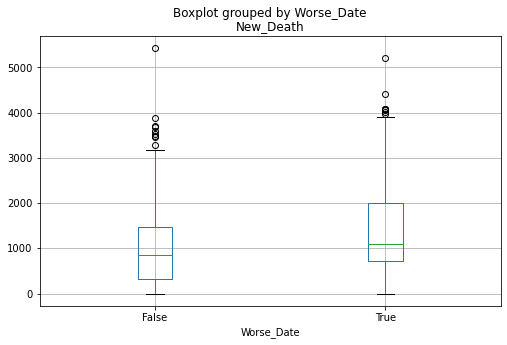

In [77]:
df_case.boxplot(column='New_Death', by='Worse_Date', figsize=(8,5))

#### Comparing numeric variables (using MinMaxScaler)
 - Compare death increase to the positive increase

In [78]:
df_case

,Date,New_Death,New_Negative,New_Positive,Worse_Date
0,2021-03-07,842,131835,41835,False
1,2021-03-06,1680,143835,60015,False
2,2021-03-05,2221,271917,68787,True
3,2021-03-04,1743,177957,65487,False
4,2021-03-03,2449,267001,66836,True
...,...,...,...,...,...
415,2020-01-17,0,0,0,False
416,2020-01-16,0,0,0,False
417,2020-01-15,0,0,0,False
418,2020-01-14,0,0,0,False


In [79]:
v2_data = df_case.iloc[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2021-03-07 00:00:00'),
  Text(1, 0, '2021-03-06 00:00:00'),
  Text(2, 0, '2021-03-05 00:00:00'),
  Text(3, 0, '2021-03-04 00:00:00'),
  Text(4, 0, '2021-03-03 00:00:00'),
  Text(5, 0, '2021-03-02 00:00:00'),
  Text(6, 0, '2021-03-01 00:00:00'),
  Text(7, 0, '2021-02-28 00:00:00'),
  Text(8, 0, '2021-02-27 00:00:00'),
  Text(9, 0, '2021-02-26 00:00:00')])

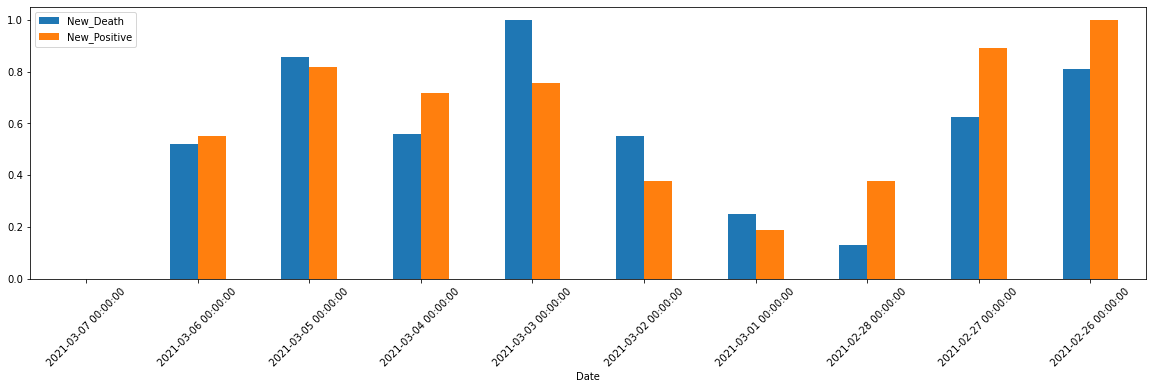

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new datafram for the scaled values
df_normalized = v2_data[['New_Death', 'Date', 'New_Positive']].copy()

# Normalize the numeric columns
df_normalized[['New_Death', 'New_Positive']] = scaler.fit_transform(df_normalized[['New_Death', 'New_Positive']])

# Plot the normalized values
df_normalized.plot(x='Date', y=['New_Death', 'New_Positive'], kind='bar', figsize=(20, 5))

plt.xticks(rotation = 45)


### 5) Created a linear regression to show the data distribution
 - Combine linregress method and scatter plot method

Slope: 0.0111
Intercept: 463.6309
so...
 f(x) = 0.0111x + 463.6309


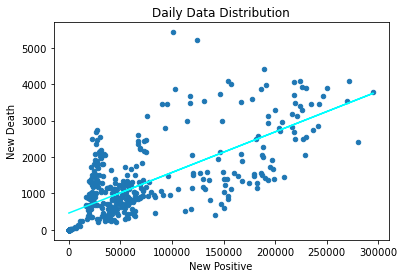

In [81]:
from scipy import stats

#
df_regression = df_case[['New_Death', 'New_Positive']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['New_Positive'], df_regression['New_Death'])
print('Slope: %.4f\nIntercept: %.4f'% (m, b))
print('so...\n f(x) = %.4fx + %.4f' % (m, b))

# Use the function (mx + b) to calculate f(x) for each x (positive) value
df_regression['fx'] = (m * df_regression['New_Positive'])+b

# Calculate the error between f(x) and the actual y (Death) value
df_regression['error'] = df_regression['fx'] - df_regression['New_Death']

# Create a scatter plot of new death vs new positvie
ax = df_regression.plot.scatter(x='New_Positive', y='New_Death')

# Plot the regression line
plt.plot(df_regression['New_Positive'], df_regression['fx'], color='cyan')

# Set title and labels for axes
ax.set(xlabel="New Positive",
       ylabel="New Death",
       title="Daily Data Distribution",)

# Display the plot
plt.show()

In [82]:
# Show the original x,y value, the f(x) value, and the error
df_regression[['New_Positive', 'New_Death', 'fx', 'error']]

,New_Positive,New_Death,fx,error
0,41835,842,929.787332,87.787332
1,60015,1680,1132.362316,-547.637684
2,68787,2221,1230.106417,-990.893583
3,65487,1743,1193.335380,-549.664620
4,66836,2449,1208.366935,-1240.633065
...,...,...,...,...
415,0,0,463.630871,463.630871
416,0,0,463.630871,463.630871
417,0,0,463.630871,463.630871
418,0,0,463.630871,463.630871


## 4. Using the regression coefficients for prediction

In [83]:
# Define a function based on our regression coefficients
def f(x):
    m = 0.0111
    b = 463.6309
    return m*x + b

posi_inc = 5000

# Get f(x) for new death(predict)
prediction = f(posi_inc)

#Death can't be less than 0 
expected_death = max(0, prediction)

#Print the estimated death
print ('If %s new positive cases per day may result in death of %.0f' % (posi_inc, expected_death))

If 5000 new positive cases per day may result in death of 519
